## **What is HR Analytics ?**  
People analytics.  
Process of analysing people's data nad understand how to manage them 

### Problems that HR face :   
* Hiring 
* Assessment 
* Retention
* Learning and Development 
* Collaboration / Team Composition 
* Absenteeism and others 


### *Import libraries*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


### *Load dataset*

In [2]:
data = pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')

### *View data*

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### *Check datatypes*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### *Print unique values of categories*

In [5]:
print(data.salary.unique())
print(data.Department.unique())

['low' 'medium' 'high']
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Since here salary is an ordinal variable we'll be encoding it in order.

In [6]:
data.salary = data.salary.astype('category')

data.salary = data.salary.cat.reorder_categories(['low','medium','high'])

data.salary = data.salary.cat.codes


Now here, the Department is a nominal category i.e. it does not have an intrinsic order. Hence we'll do one-hot encoding here. 

In [7]:
dept = pd.get_dummies(data.Department)

dept.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


Dummy Trap

In [8]:
dept = dept.drop("accounting" , axis = 1)

data = data.drop('Department', axis = 1)

data = data.join(dept)



### *Descriptive Statistics*

In [9]:
# Total records 
n_employees = len(data)

#Print employees who left/stayed 
print(data.left.value_counts())

#Print % of employees who left/stayed
print(data.left.value_counts()/n_employees*100)

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64


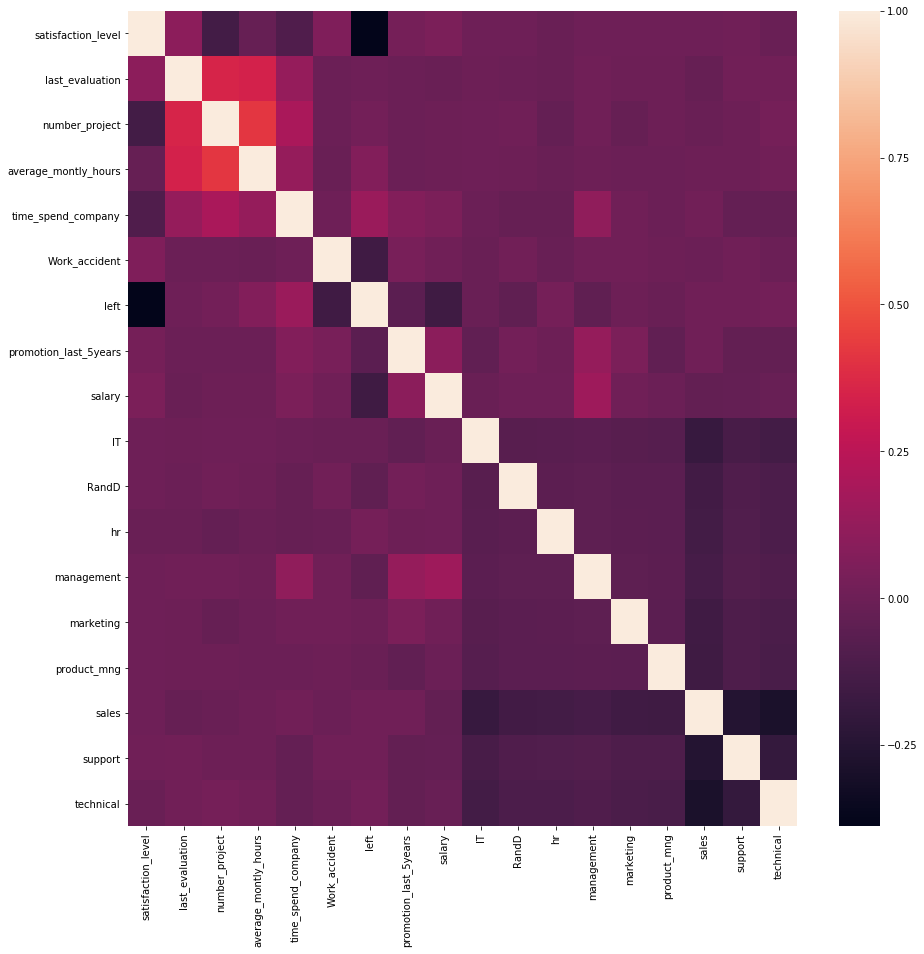

In [10]:
#Correlations

import matplotlib.pyplot as plt 
import seaborn as sns 

fig = plt.figure(figsize=(15,15))

corr_matrix = data.corr()
sns.heatmap(corr_matrix)

plt.show()

> Note that a negative correlation doesn't mean the correlation between both variables is weak, it means they're inversley correlated. 

### *Let's dig deeper ! *


Comparing employees who left till now ! 

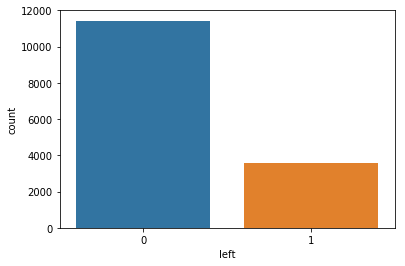

In [11]:
sns.countplot(x='left',data=data)
plt.show()

Salary distribution of those who left 

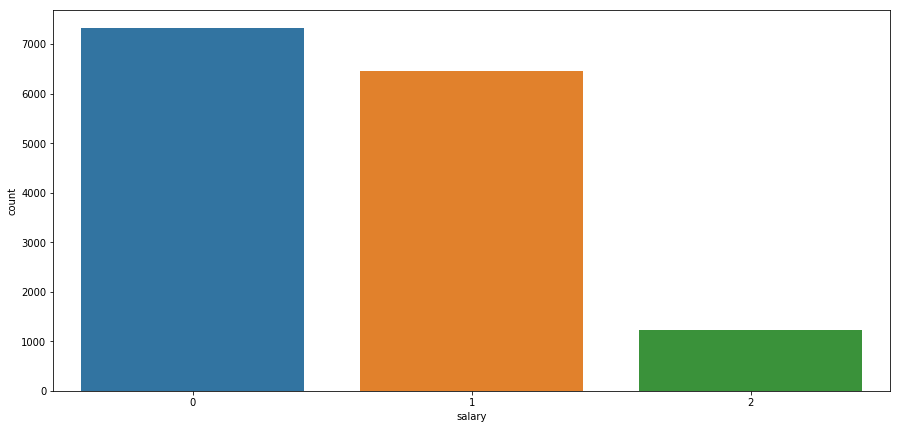

In [12]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary',data=data)
plt.show()

Satisfaction Level of those who left 

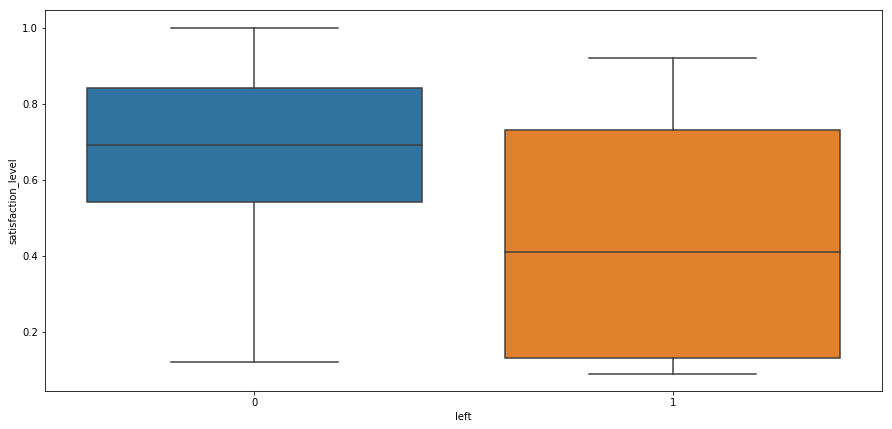

In [13]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "satisfaction_level", data=data)
plt.show()

Number of projects of those who left

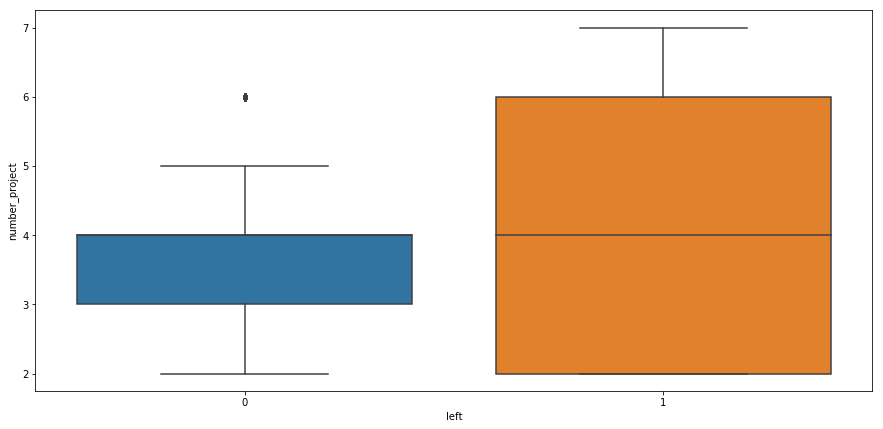

In [14]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "number_project", data=data)
plt.show()

Last evaluation of those who left 

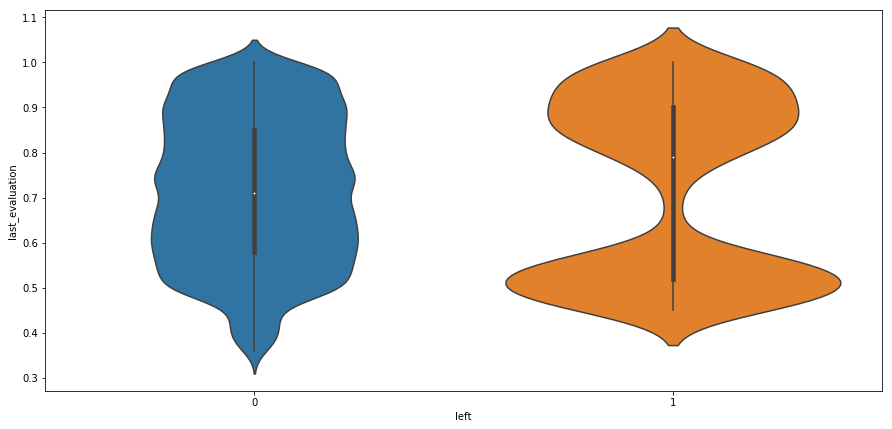

In [15]:
fig = plt.figure(figsize=(15,7))
sns.violinplot(x="left", y= "last_evaluation", data=data)
plt.show()